# LCPB 22-23 Exercise 2 (Restricted Boltzmann Machines) 

<center><h1>Group 2307</h1></center>


<center><style>
table {
    font-size: 24px;
}
</style></center>

| Last Name          | First Name            |Matricola number|
|--------------------|-----------------------|----------------|
| Bertinelli         | Gabriele              |1219907 (tri)   |
| Cacciola           | Martina               |2097476         |
| Pervysheva         | Yelyzaveta            |2039398         |           
| Waththe Liyanage   | Wageesha Widuranga    |2078719         |

## Importing packages

In [1]:
import numpy as np
import numpy.random as npr
import pandas as pd

# random seed for reproducibility
npr.seed(12345)

import matplotlib as mpl
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 14

from IPython.display import display_html

## Importing Dataset and defining initial variables

In [2]:
# Selecting the data we want to work with
CASE = 1
if CASE == 0:
    data_name = 'DATA'
    # size of each block of data (!= 1 for one-hot)
    BLSIZE = 1
    # number of hidden units
    M = 3
elif CASE == 1:
    dname = 'DATA_b'
    BLSIZE = 4
    M = 3
elif CASE == 2:
    dname = 'DATA_c'
    BLSIZE = 6
    M = 2

fname = dname + '/x_RBM_q0.1.dat'

# loading data: each row is a list of visible units
# NOTE: data "x" here is named "v" for "visible
v = np.loadtxt(fname, delimiter=' ', dtype=int)

# Store in v0, because later we will shuffle v
v_0 = np.copy(v)

# N=size of input
N = len(v)

# L=size of each sample
L = len(v[1])

# If SPINS = True, values in {-1, +1}, otherwise {0, 1}
SPINS = False

if SPINS:
    # sigmoid takes into account energy diff = 2
    GAP = 2
    # convert 0, 1 -> -1, 1
    v = 2 * v - 1
    VMIN = -1 
else:
    GAP = 1
    VMIN = 0

# Range of each initial weight
sigma = np.sqrt(4 / float(L + M))

# Initial weights from a normal distribution
w = sigma * npr.randn(L, M)
a = sigma * np.random.randn(L)
b = np.zeros(M)

print("w[:3] =", w[:3])
print("a =", a[:3])
print('...')

w_0, a_0, b_0 = np.copy(w), np.copy(a), np.copy(b)

w[:3] = [[-0.085369    0.19973318 -0.21662092]
 [-0.23175556  0.81978717  0.5810904 ]
 [ 0.03874526  0.11749627  0.32070458]]
a = [ 0.35972076 -0.00418359  0.02085534]
...


## Original Dataset visualization

In [3]:
def is_one(cell_value):
    color0 = 'background-color: blue; color: white'
    color1 = 'background-color: cyan;'
    if type(cell_value) in [float, int]:
        if cell_value == 1:
            return color1
    return color0

N1=12
df0 = pd.DataFrame(v_0[:N1])

df0s = df0.style.set_table_attributes("style='display:inline'")
df0s.applymap(is_one)
sty = [dict(selector="caption",props=[("font-size", "150%")])]
df0s.set_caption('Original').set_table_styles(sty)

display_html(df0s._repr_html_(), raw=True)

df=df0
t=[i for i in range(N1)]
g = pd.Categorical(df[t]).codes # convert groups to indices  
df.style.apply(
    lambda x: ['background-color: {}'.format("#FFCCCC") for i in g], 
    # comment the 2nd line if working w/ case 0 or 1. Otherwise comment the 1st one
    subset=[0,1,2,3, 8,9,10,11, 16,17,18,19 ]
    #subset=[0,1,2,3,4,5, 12,13,14,15,16,17, 23,24,25,26,27,28,29]
)

Original 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 
 
 0 
 0 
 0 
 1 
 0 
 1 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 0 
 1 
 0 
 0 
 0 
 0 
 1 
 0 
 
 
 1 
 0 
 0 
 1 
 0 
 1 
 0 
 0 
 0 
 0 
 0 
 0 
 1 
 1 
 0 
 0 
 0 
 0 
 0 
 0 
 1 
 
 
 2 
 0 
 0 
 1 
 0 
 0 
 1 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 1 
 0 
 0 
 0 
 0 
 0 
 1 
 
 
 3 
 0 
 1 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 1 
 0 
 0 
 0 
 0 
 1 
 0 
 1 
 0 
 0 
 0 
 
 
 4 
 0 
 0 
 1 
 0 
 0 
 0 
 1 
 0 
 1 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 0 
 1 
 0 
 0 
 
 
 5 
 0 
 0 
 0 
 1 
 0 
 1 
 0 
 0 
 0 
 0 
 1 
 0 
 1 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 
 
 6 
 0 
 0 
 1 
 0 
 0 
 1 
 0 
 0 
 0 
 0 
 1 
 0 
 0 
 1 
 0 
 0 
 0 
 1 
 0 
 0 
 
 
 7 
 0 
 0 
 1 
 0 
 1 
 0 
 0 
 0 
 0 
 0 
 0 
 1 
 1 
 0 
 0 
 0 
 0 
 0 
 0 
 1 
 
 
 8 
 1 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 0 
 1 
 0 
 0 
 0 
 1 
 0 
 0 
 1 
 0 
 0 
 0 
 
 
 9 
 0 
 0 
 0 
 1 
 1 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 0 
 1 
 0 
 0 
 0 
 0 
 1 
 0 
 
 
 10 
 0 
 0 
 1 
 0 
 0 
 1 
 0 
 0 
 0 
 0 
 1 
 0 
 1 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 
 
 11 
 0 
 0 
 0 
 1 
 0 
 1 
 0 
 0 
 0 
 0 
 0 
 1 
 1 
 0 
 0 
 0 
 0 
 0 
 1 
 0

## Defining "tree" plot function

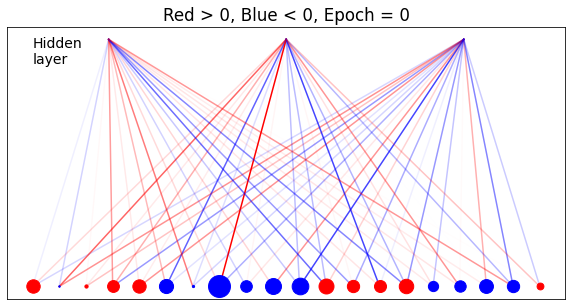

In [4]:
(x_v, y_v) = (np.zeros(L), np.linspace(-0.5, 0.5, L))
(x_h, y_h) = (np.ones(M), np.linspace(-0.35, 0.35, M))

def mycolor(value):
    if value > 0: return 'red'
    elif value < 0: return 'blue'
    return 'black'

# plot network with weights and units, all color-coded
def plotgraph(epoch=0):
    fig, ax = plt.subplots(1, 1, figsize=(10, 5))
    # remove ticks
    ax.tick_params(left=False, bottom=False)
    ax.xaxis.set_major_formatter(mpl.ticker.NullFormatter())
    ax.yaxis.set_major_formatter(mpl.ticker.NullFormatter())

    # scale for line width based on max weight
    lw_scale = 1 / abs(w).max()
    for i in range(L):
        for j in range(M):
            ex = (y_v[i], y_h[j])
            ey = (x_v[i], x_h[j])
            col = mycolor(w[i][j])
            ax.plot(ex, ey, col, zorder=1, alpha=lw_scale*abs(w[i][j]))

    # scale for circles representing the units
    c_scale = 500
    
    # plot visible units
    for i in range(L):
        ax.scatter(y_v[i], x_v[i], s=c_scale * abs(a[i]),
                   zorder=2, c=mycolor(a[i]))

    # plot hidden units (with square markers)
    for j in range(M):
        ax.scatter(y_h[j], x_h[j], s=min(300, c_scale * abs(b[j])),
                   zorder=2, c=mycolor(b[j]), marker='s')
    
    ax.set_title(f'Red > 0, Blue < 0, Epoch = {epoch}')
    ax.text(-0.5, 0.9, 'Hidden\nlayer')
    plt.show()
    
'''
def plotgraph_vert(epoch=0):
    # scale for line width based on max weight
    lw_scale = 2 / abs(w).max()
    for i in range(L):
        for j in range(M):
            ex = (x_v[i], x_h[j])
            ey = (y_v[i], y_h[j])
            col = mycolor(w[i][j])
            plt.plot(ex, ey, col, zorder=1, lw=lw_scale * abs(w[i][j]))

    # scale for circles based on max couplings
    c_scale = 300 / (a.max() + b.max())

    # plot visible units
    for i in range(L):
        plt.scatter(x_v[i], y_v[i], s=c_scale*abs(a[i]),
                    zorder=2, c=mycolor(a[i]))
        
    # plot hidden units (with square markers)
    for j in range(M):
        plt.scatter(x_h[j], y_h[j], s=c_scale*abs(b[j]),
                    zorder=2, c=mycolor(b[j]), marker='s')

    plt.figaspect(1)
    plt.title(f'Red > 0, Blue < 0, Epoch = {epoch}')
    plt.show()
'''
# Plotting relations between visible units and hidden variables;
# Lines are the weights;
# The size of the feaures (circles, squares, lines) is a proxy 
# for the abs value of the visible bias, hidden bias, weights;

plotgraph()

## Defining Activation Function w/ cdf

In [5]:
def activate(in_layer, weights, bias, phase, info=False):
    act = bias + np.dot(in_layer, weights)

    # prepare a list of -1s or 0s (depending on SPINS = T/F)
    out_layer = np.full(act.shape, VMIN, dtype=int)

    if phase == 1: # positive phase of CD
        
        r = npr.random_sample((len(act), ))
        
        # like below but simpler (no cdf, only two levels)
        prob = 1 / (1 + np.exp(-GAP * act))
        out_layer[r < prob] = 1
    else:
        # nÂ° of samples
        n_sample = len(act) // BLSIZE
        p = npr.random_sample((n_sample, ))
        for i in range(n_sample):
            
            # cumulated boltzmann weights
            block = act[(i * BLSIZE):((i + 1) * BLSIZE)]
            prob = np.cumsum(np.exp(GAP * block))
            
            # normalization (so the tail of cdf is 1)
            prob /= prob[-1]
            
            # put out_layer = 1 in the previous index to the one where
            # the generated number is higher than the cdf 
            out_layer[np.argmax(p[i] < prob) + i * BLSIZE] = 1

    if info: # print debug
        print(f'in_layer = {in_layer}') 
        print(f'act = {act}')
        print(f'prob = {prob}')
        print(f'out_layer = {out_layer}')

    return out_layer

## Defining Optimizers

In [6]:
def rmsprop(data, model, s, beta, eps, lrate):
    g = data - model # gradient
    s1 = beta * s + (1 - beta) * g**2
    d = lrate * g / np.sqrt(s1 + eps)

    return s1, d

def adam(data, model, m, s, t, beta, eps, lrate):
    g = data - model # gradient
    m0 = beta * m + (1 - beta) * g
    s0 = beta * s + (1 - beta) * g**2

    m1 = m0 / (1 - beta**(t + 1))
    s1 = s0 / (1 - beta**(t + 1))
    d = lrate * m1 / np.sqrt(s1 + eps)

    return m0, s0, d

In [7]:
def energy_part(h, w, a):
        energy_bin = []
        E_n = [] 
        for i in range(4):
            energy_vec = np.zeros((1, 4))
            energy_vec[:, i] = 1
            energy_bin.append(energy_vec) 
        for i in range (4):
            energy_p = np.dot((np.dot(h, w) + a).T, energy_bin[i])
            E_n.append(energy_p)
        return E_n, energy_bin
        
    
    # Temperature: if the temp is too low, the energy of the 1st level can be too low, and the prob
    # would be the dom factor and the "extraction" from the cumulative can be misleading 
def prob_part(E_n, ampl = 0.05):
    p_n = []
    Z = np.sum(E_n)
    for i in range(4):
        pe_i = np.exp(-np.sum(E_n[i])*ampl) / Z
        p_n.append(pe_i)
    return p_n
    
    
    
def Energy(v, h, w, a, b):
    return -a.dot(v)-h.dot(b)-((v.T).dot(w)).dot(h)

def PartZ(w, a, b):
    res = 0
    '''if SPINS==True:
        for i in range(2**M):
            h=np.array(reversed([(i//2**j)%2 for j in range(M)]))
            for j in range(L//BLSIZE):
                
              
    '''    
    if SPINS==False:
        for i in range(2**M):
            h=np.array([(i//2**j)%2 for j in reversed(range(M))])
            res = np.exp(b.dot(h))
            expact = np.exp(a+w.dot(h))
            for j in range(L//BLSIZE):
                res*=sum(expact[j*BLSIZE:(j+1)*BLSIZE])
    return res

l_rate = 0.9090909090909092


l_rate = 0.8333333333333337


l_rate = 0.7692307692307697


l_rate = 0.7142857142857149


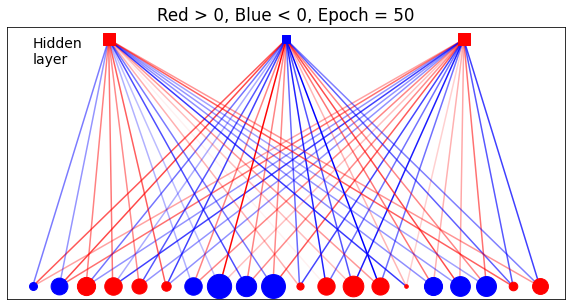

l_rate = 0.6666666666666671


l_rate = 0.6250000000000006


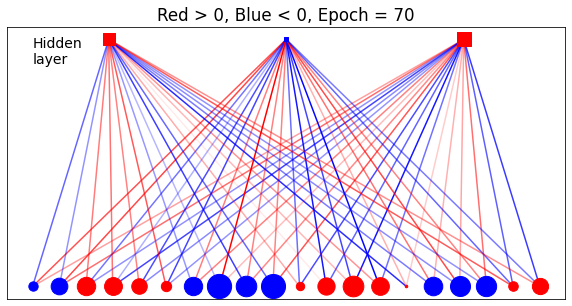

l_rate = 0.5882352941176475


l_rate = 0.555555555555556


l_rate = 0.5263157894736847


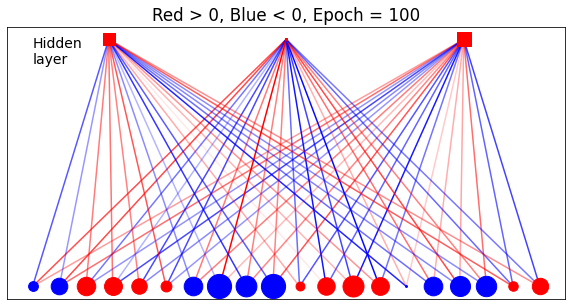

l_rate = 0.5000000000000009


In [8]:
# Learning rate
lrate = 1.0

# Minibatch size and count
m_size, m_count = 500, 0

# model parameters
beta = 0.9
eps = 1e-8

# Initializing values at 0
sw, mw = 0, 0
sa, ma = 0, 0
sb, mb = 0, 0

# Choose between 'rmsprop', 'adam', 'vanilla'
model = 'rmsprop'

# Number of CD steps
CD_steps = 1

# Number of epochs
n_epochs = 100

LogL = []
mean_energy = []

# Train model
for epoch in range(n_epochs):
    
    # aggregate normalization of batch statistics and learning rate
    lrate_m = lrate / m_size

    # Loop over visible units
    for k in range(N):
        E = 0   
        if m_count == 0:
            # initialization step in the minibatch
            v_data, v_model = np.zeros(L), np.zeros(L)
            h_data, h_model = np.zeros(M), np.zeros(M)
            vh_data, vh_model = np.zeros((L, M)), np.zeros((L, M))

        # Positive CD phase: generate h
        h = activate(v[k], w, b, phase=1)
        
        # Negative CD phase: generate fantasy vf w/ one-hot encoding
        vf = activate(h, w.T, a, phase=0)

        # Additional divergent steps
        for i in range(CD_steps - 1):
            hf = activate(vf, w, b, phase=1)
            vf = activate(hf, w.T, a, phase=0)

        # Positive CD phase: fantasy hf from fantasy vf
        hf = activate(vf, w, b, phase=1)

        # Update quantities
        v_data += v[k]
        v_model += vf
        h_data += h
        h_model += hf
        vh_data += np.outer(v[k].T, h)
        vh_model += np.outer(vf.T, hf)

        m_count += 1
        if m_count == m_size: # reached the end of minibatch
            
            # Vanilla GD
            if model == 'van':
                dw = lrate_m * (vh_data - vh_model)
                da = lrate_m * (v_data - v_model)
                db = lrate_m * (h_data - h_model)
            
            # RMSprop
            elif model == 'rmsprop':
                sw, dw = rmsprop(vh_data, vh_model, sw,
                                 beta, eps, lrate_m)
                sa, da = rmsprop(v_data, v_model, sa,
                                 beta, eps, lrate_m)
                sb, db = rmsprop(h_data, h_model, sb,
                                 beta, eps, lrate_m)
            # ADAM
            elif model == 'adam':
                mw, sw, dw = adam(vh_data, vh_model, mw, sw, epoch,
                                  beta, eps, lrate_m)
                ma, sa, da = adam(v_data, v_model, ma, sa, epoch,
                                  beta, eps, lrate_m)
                mb, sb, db = adam(h_data, h_model, mb, sb, epoch,
                                  beta, eps, lrate_m)
                                
            w = w + dw
            a = a + da
            b = b + db
            m_count = 0 # move to the next minibatch
        E += Energy(v_data, h_data, w, a, b)
        #E += energy_part(h_data, w, a)
        
    # Shuffle input data
    npr.shuffle(v)
    
    # Decrease the learning rate if not using ADAM
    if (model != 'adam'):
        lrate = lrate / (1 + 0.01 * lrate)

    if epoch % 10 == 9:
        plotgraph(epoch + 1)
        if (model != 'adam'):
            print(f'l_rate = {lrate}')
            
    mean_energy.append(E/N)
    LogL.append(-E/N-np.log(PartZ(w, a, b)))
    #LogL.append(-E/N-np.log(prob_part(E_n=E, ampl = 0.05)))

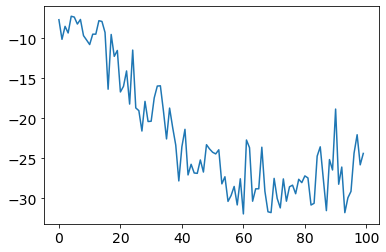

In [9]:
plt.plot(np.arange(n_epochs), LogL)

# we can make a nicer plot

## Noise reduction

In [11]:
# large GAP <-> low temperature
GAP *= 40

# original, non-reshuffled data is in v0
v1 = np.zeros_like(v_0)
for k in range(N):
    # positive CD phase: generate h
    h = activate(v_0[k], w, b, phase=1)
    # negative CD phase: generating fantasy vf
    v1[k] = activate(h, w.T, a, phase=0)

# difference between model and data
diff = (v1 - v_0) / 2
# save files with data
str0 = fname + '_M' + str(M) + '-mini' + str(m_size)
np.savetxt(str0 + '.fantasy', (v1 + 1) / 2, fmt='%d', delimiter=' ')
np.savetxt(str0 + '.diff', diff, fmt='%d', delimiter=' ')

# cut full dataset to first nrows rows
nrows = 20
data = np.copy(v_0[:nrows])
pred = np.copy(((v1[:nrows] - VMIN) / (1 - VMIN)).astype(int))

# convert one-hot encoding to polar/non-polar flags
one_per_block = range(0, v_0.shape[1], BLSIZE)
for i in one_per_block:
    data[:, i] = np.argmax(data[:, i:(i + BLSIZE)], axis=1)
    pred[:, i] = np.argmax(pred[:, i:(i + BLSIZE)], axis=1)
data = pd.DataFrame(data[:, one_per_block])
pred = pd.DataFrame(pred[:, one_per_block])
thresh = BLSIZE // 2
data[data < thresh] = 0
data[data >= thresh] = 'P'
pred[pred < thresh] = 0
pred[pred >= thresh] = 'P'
data[data == 0] = 'N'
pred[pred == 0] = 'N'

# stylistic manipulations
data = data.style.set_table_attributes("style='display:inline'")
pred = pred.style.set_table_attributes("style='display:inline'")

def is_polar(cell_value):
    color0 = 'background-color: gray; color: white'
    color1 = 'background-color: gold; color: black'
    if cell_value == 'P':
        return color1
    return color0
data.applymap(is_polar)
pred.applymap(is_polar)

sty = [dict(selector='caption', props=[('font-size', '150%')])]
data.set_caption('Data').set_table_styles(sty)
pred.set_caption('Model').set_table_styles(sty)

display_html(data._repr_html_() + pred._repr_html_(), raw=True)

Data 0 1 2 3 4 
 
 0 
 P 
 N 
 P 
 N 
 P 
 
 
 1 
 P 
 N 
 P 
 N 
 P 
 
 
 2 
 P 
 N 
 P 
 N 
 P 
 
 
 3 
 N 
 P 
 N 
 P 
 N 
 
 
 4 
 P 
 P 
 N 
 P 
 N 
 
 
 5 
 P 
 N 
 P 
 N 
 P 
 
 
 6 
 P 
 N 
 P 
 N 
 N 
 
 
 7 
 P 
 N 
 P 
 N 
 P 
 
 
 8 
 N 
 P 
 N 
 N 
 N 
 
 
 9 
 P 
 N 
 P 
 N 
 P 
 
 
 10 
 P 
 N 
 P 
 N 
 P 
 
 
 11 
 P 
 N 
 P 
 N 
 P 
 
 
 12 
 P 
 N 
 P 
 N 
 P 
 
 
 13 
 P 
 N 
 P 
 N 
 P 
 
 
 14 
 N 
 P 
 N 
 P 
 N 
 
 
 15 
 P 
 N 
 P 
 N 
 P 
 
 
 16 
 P 
 N 
 P 
 N 
 P 
 
 
 17 
 N 
 P 
 N 
 P 
 N 
 
 
 18 
 P 
 P 
 N 
 N 
 N 
 
 
 19 
 N 
 P 
 N 
 P 
 N 
 
 Model 0 1 2 3 4 
 
 0 
 P 
 N 
 P 
 N 
 P 
 
 
 1 
 P 
 N 
 P 
 N 
 P 
 
 
 2 
 P 
 N 
 P 
 N 
 P 
 
 
 3 
 N 
 P 
 N 
 P 
 N 
 
 
 4 
 N 
 P 
 N 
 P 
 N 
 
 
 5 
 P 
 N 
 P 
 N 
 P 
 
 
 6 
 P 
 N 
 P 
 N 
 P 
 
 
 7 
 P 
 N 
 P 
 N 
 P 
 
 
 8 
 N 
 P 
 N 
 P 
 N 
 
 
 9 
 P 
 N 
 P 
 N 
 P 
 
 
 10 
 P 
 N 
 P 
 N 
 P 
 
 
 11 
 P 
 N 
 P 
 N 
 P 
 
 
 12 
 P 
 N 
 P 
 N 
 P 
 
 
 13 
 P 
 N 
 P 
 N 
 P 
 
 
 14 
 N 
 P 
 N 
 P 
 N 
 
 
 15 
 P 
 N 
 P 
 N 
 P 
 
 
 16 
 P 
 N 
 P 
 N 
 P 
 
 
 17 
 N 
 P 
 N 
 P 
 N 
 
 
 18 
 N 
 P 
 N 
 P 
 N 
 
 
 19 
 N 
 P 
 N 
 P 
 N